# Reporting of results sandbox

This notebook is a sandbox for working on the "Reporting of results" section of the review.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('white')

In [103]:
fname = '../data/reporting_results.csv'
df = pd.read_csv(fname, header=0)
df = df.drop(columns=['Unnamed: 0', 'Title', 'Comment'])
df['Result'] = pd.to_numeric(df['Result'], errors='coerce')
df = df.dropna()

In [104]:
df.head()

,Citation,Task,Metric,Model,Description,Result
0,Almogbel2018,mental workload classification,accuracy,arch1,CNN 30 s,0.8725
1,Almogbel2018,mental workload classification,accuracy,arch2,CNN 60 s,0.9202
2,Almogbel2018,mental workload classification,accuracy,arch3,CNN 90 s,0.8838
3,Almogbel2018,mental workload classification,accuracy,arch4,CNN 120,0.8224
4,Almogbel2018,mental workload classification,accuracy,arch5,CNN 150,0.9531


In [105]:
def extract_model_type(x):
    if 'arch' in x:
        out = 'Proposed'
    elif 'trad' in x:
        out = 'Baseline (traditional)'
    elif 'dl' in x:
        out = 'Baseline (deep learning)'
    else:
        raise ValueError('Model type {} not supported.'.format(x))
    
    return out

df['model_type'] = df['Model'].apply(extract_model_type)

In [106]:
# Extract accuracy rows only
acc_df = df[df['Metric'] == 'accuracy']

In [107]:
# Create new column that contains both citation and task information
acc_df['citation_task'] = acc_df[['Citation', 'Task']].apply(lambda x: ' ['.join(x) + ']', axis=1)

# Create a new column with the year
acc_df['year'] = acc_df['Citation'].apply(lambda x: int(x[x.find('2'):x.find('2') + 4]))

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [108]:
# Order by average proposed model accuracy
# acc_ind = acc_df[acc_df['model_type']=='Proposed'].groupby('Citation').mean().sort_values(by='year').index
acc_ind = acc_df[acc_df['model_type']=='Proposed'].groupby('Citation').mean().sort_values(by='Result').index
acc_df['Citation'] = acc_df['Citation'].astype('category')
acc_df['Citation'].cat.set_categories(acc_ind, inplace=True)
acc_df = acc_df.sort_values(['Citation'])

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [109]:
acc_df

,Citation,Task,Metric,Model,Description,Result,model_type,citation_task,year
640,Stober2015,music imagery (64 Hz),accuracy,trad1,raw + SVC,0.1480,Baseline (traditional),Stober2015 [music imagery (64 Hz)],2015
641,Stober2015,music imagery (64 Hz),accuracy,arch1,Encoder + CNN maj,0.2780,Proposed,Stober2015 [music imagery (64 Hz)],2015
569,Sun2016,speech classification,accuracy,arch1,NES-I,0.3436,Proposed,Sun2016 [speech classification],2016
570,Sun2016,speech classification,accuracy,arch2,NES-B,0.3900,Proposed,Sun2016 [speech classification],2016
571,Sun2016,speech classification,accuracy,arch3,NES-G,0.4327,Proposed,Sun2016 [speech classification],2016
572,Sun2016,speech classification,accuracy,trad1,SVM,0.2091,Baseline (traditional),Sun2016 [speech classification],2016
292,Deiss2018,clinical features classification,accuracy,dl2,MLP,0.2314,Baseline (deep learning),Deiss2018 [clinical features classification],2018
291,Deiss2018,clinical features classification,accuracy,dl1,CNN,0.4158,Baseline (deep learning),Deiss2018 [clinical features classification],2018
290,Deiss2018,clinical features classification,accuracy,arch2,HAMLET-CAE,0.3906,Proposed,Deiss2018 [clinical features classification],2018
289,Deiss2018,clinical features classification,accuracy,arch1,HAMLET-CNN,0.4075,Proposed,Deiss2018 [clinical features classification],2018


In [110]:
# Only keep 2 best per task and model type
acc2_df = acc_df.sort_values(['Citation', 'Task', 'model_type', 'Result'], ascending=True).groupby(
                ['Citation', 'Task', 'model_type']).tail(2)

Text(0,0.5,'')

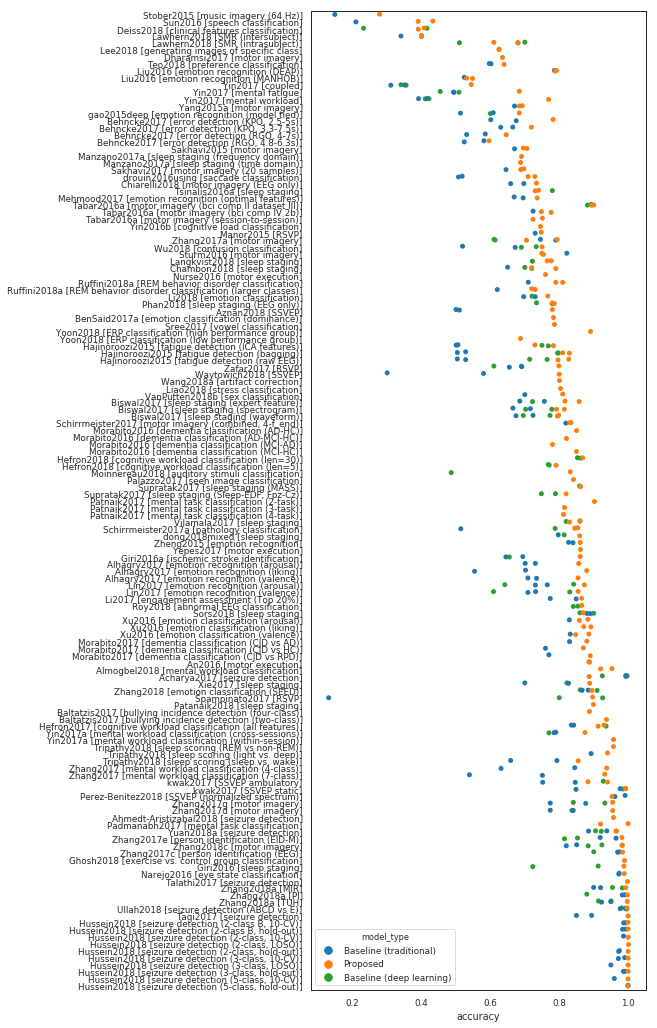

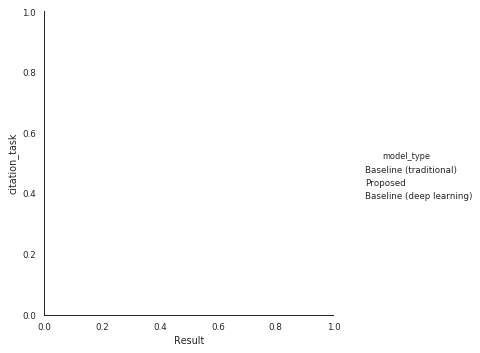

In [111]:
fig, ax = plt.subplots(figsize=(6, 18));
sns.catplot(y='citation_task', x='Result', hue='model_type', data=acc2_df, ax=ax);
ax.set_xlabel('accuracy')
ax.set_ylabel('')

## Looking at the difference in accuracy

In [11]:
# Only keep the maximum accuracy per citation & task
best_df = acc_df.groupby(['Citation', 'Task', 'model_type'])['Result'].max().reset_index()

# Only keep citations/tasks that have a traditional baseline
best_df = best_df.groupby(['Citation', 'Task']).filter(lambda x: 'Baseline (traditional)' in x.values).reset_index()

#  Compute difference between proposed and traditional baseline
diff_df = best_df.groupby(['Citation', 'Task']).apply(
            lambda x: x[x['model_type'] == 'Proposed']['Result'].iloc[0] - \
                      x[x['model_type'] == 'Baseline (traditional)']['Result'].iloc[0]).reset_index()
diff_df = diff_df.rename(columns={0: 'acc_diff'})

In [19]:
diff_df.describe()

,acc_diff
count,92.000000
mean,0.087728
std,0.111761
min,-0.110000
25%,0.016750
50%,0.060500
75%,0.112100
max,0.767000


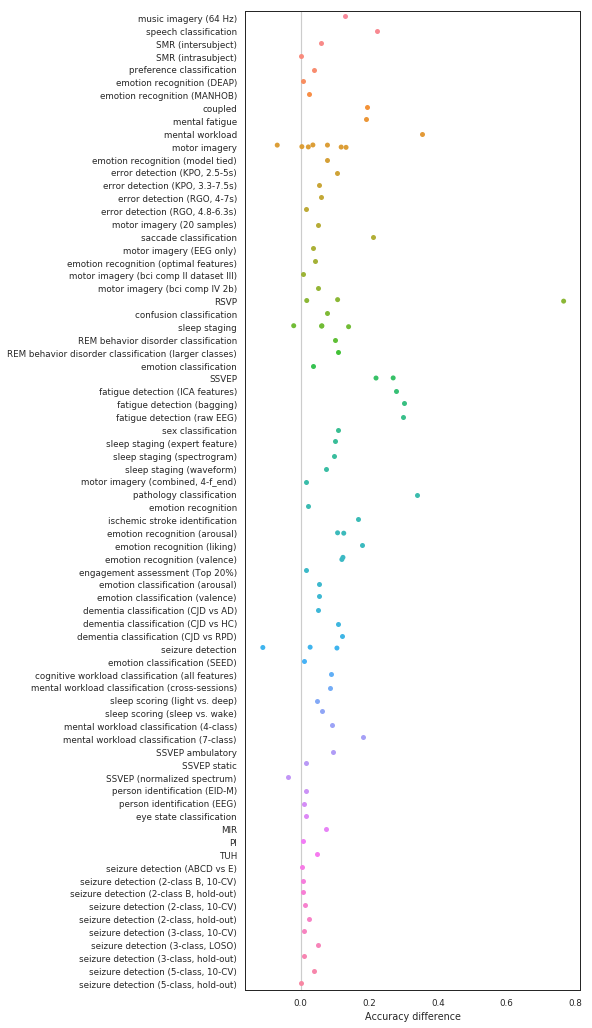

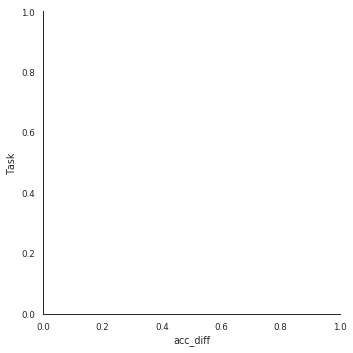

In [69]:
fig, ax = plt.subplots(figsize=(6, 18));
sns.catplot(y='Task', x='acc_diff', data=diff_df, ax=ax);
ax.set_xlabel('Accuracy difference')
ax.set_ylabel('')
ax.axvline(0, c='k', alpha=0.2)

Text(0,0.5,'Number of studies')

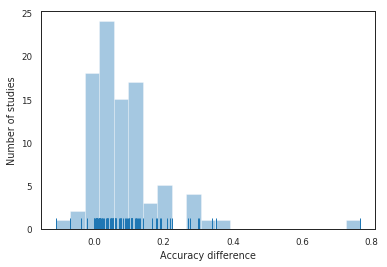

In [20]:
fig, ax = plt.subplots()
sns.distplot(diff_df['acc_diff'], kde=False, rug=True, ax=ax)
ax.set_xlabel('Accuracy difference')
ax.set_ylabel('Number of studies')

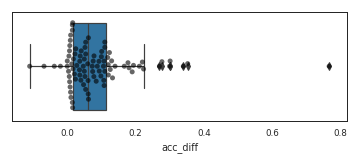

In [219]:
fig, ax = plt.subplots(figsize=(6, 2))
ax = sns.boxplot(x='acc_diff', data=diff_df)
ax = sns.swarmplot(x='acc_diff', data=diff_df, color="0", alpha=0.6)

In [112]:
# Pivot dataframe to plot proposed vs. baseline accuracy as a scatterplot
best_df['citation_task'] = best_df[['Citation', 'Task']].apply(lambda x: ' ['.join(x) + ']', axis=1)
acc_comparison_df = best_df.pivot(index='citation_task', columns='model_type', values='Result')

(0, 1.1)

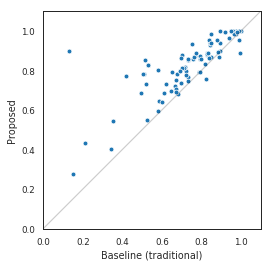

In [97]:
fig, ax = plt.subplots()
sns.scatterplot(data=acc_comparison_df, x='Baseline (traditional)', y='Proposed', ax=ax)
ax.plot([0, 1.1], [0, 1.1], c='k', alpha=0.2)
plt.axis('square')
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])

## Adding in domain information

In [261]:
def load_data_items(start_year=2014):
    """Load data items table.

    TODO:
    - Normalize column names?
    - Double check all the required columns are there?
    """
    fname = '../data/data_items.csv'
    df = pd.read_csv(fname, header=1)

    # A little cleaning up
    df = df.iloc[:195, :]
    df = df.dropna(axis=0, how='all')
    df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))
    df = df[df['Year'] >= start_year]

    return df

In [262]:
data_items_df = load_data_items(start_year=2015)
domains_df = data_items_df.filter(regex='(?=Domain*|Citation)')

In [181]:
# Concatenate domains into one string
def concat_domains(x):
    domain = ''
    for i in x[1:]:
        if isinstance(i, str):
            domain += i + '/'
    return domain[:-1]

domains_df['domain'] = data_items_df.filter(regex='(?=Domain*)').apply(concat_domains, axis=1)

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [192]:
diff_domain_df = diff_df.merge(domains_df, on='Citation', how='left')
diff_domain_df = diff_domain_df.sort_values(by='domain')
diff_domain_df.head()

,Citation,Task,acc_diff,Domain 1,Domain 2,Domain 3,Domain 4,domain
2,Lawhern2018,SMR (intersubject),0.0600,Classification of EEG signals,BCI,Active & Reactive,MI & ERP,BCI/Active & Reactive/MI & ERP
3,Lawhern2018,SMR (intrasubject),0.0000,Classification of EEG signals,BCI,Active & Reactive,MI & ERP,BCI/Active & Reactive/MI & ERP
24,Zhang2017a,motor imagery,0.0038,Classification of EEG signals,BCI,Active,Motor imagery,BCI/Active/Motor imagery
72,Zhang2017d,motor imagery,0.1184,Classification of EEG signals,BCI,Active,Motor imagery,BCI/Active/Motor imagery
71,Zhang2017g,motor imagery,0.0784,Classification of EEG signals,BCI,Active,Motor imagery,BCI/Active/Motor imagery


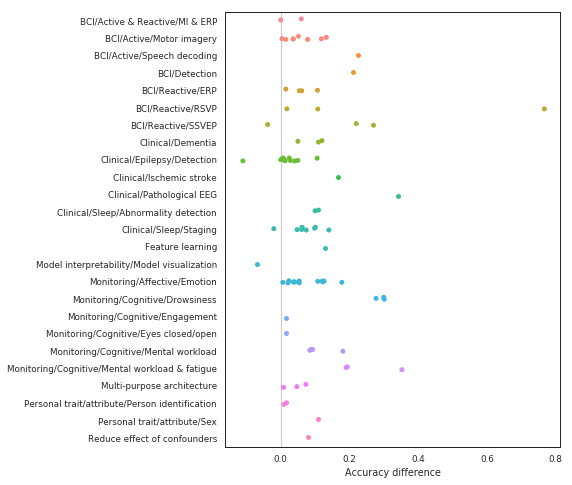

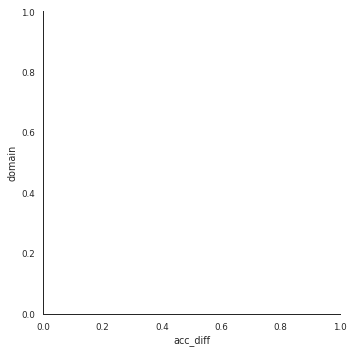

In [197]:
fig, ax = plt.subplots(figsize=(6, 8));
sns.catplot(y='domain', x='acc_diff', jitter=True, data=diff_domain_df, ax=ax);
ax.set_xlabel('Accuracy difference')
ax.set_ylabel('')
ax.axvline(0, c='k', alpha=0.2)

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


count    92.000000
mean      0.087728
std       0.111761
min      -0.110000
25%       0.016750
50%       0.060500
75%       0.112100
max       0.767000
Name: acc_diff, dtype: float64
iqr	0.095350


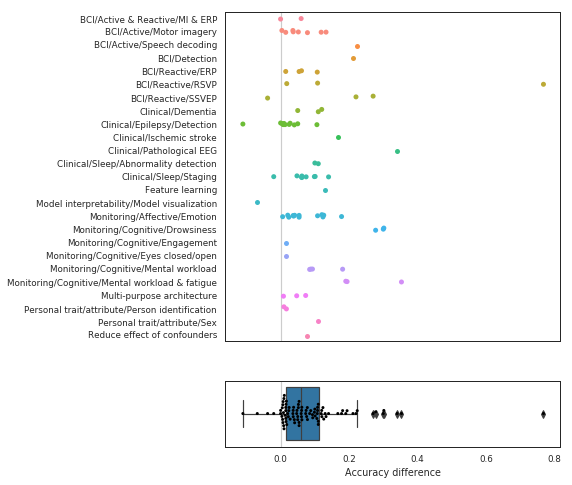

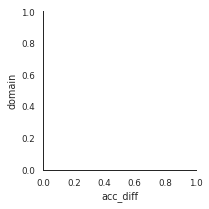

In [247]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 8), gridspec_kw = {'height_ratios':[5, 1]});

sns.catplot(y='domain', x='acc_diff', size=3, jitter=True, data=diff_domain_df, ax=axes[0]);
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].axvline(0, c='k', alpha=0.2)

sns.boxplot(x='acc_diff', data=diff_df, ax=axes[1])
sns.swarmplot(x='acc_diff', data=diff_df, color="0", size=3, ax=axes[1])
axes[1].axvline(0, c='k', alpha=0.2)
axes[1].set_xlabel('Accuracy difference')

iqr = diff_df['acc_diff'].quantile(.75) - diff_df['acc_diff'].quantile(.25)
print(diff_df['acc_diff'].describe())
print('iqr\t{:.6f}'.format(iqr))

## Inspection/visualization techniques

In [263]:
data_items_df['Analysis of learned parameters'].value_counts()

No                                                                                                                                                                                                                                                                                                                     103
Filter visualization                                                                                                                                                                                                                                                                                                     2
Analysis of mean attention score values for a single subject                                                                                                                                                                                                                                                             1
Visualization of weights and activations               